In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

data.drop(columns=["customerID"], inplace=True)
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors="coerce")
data["TotalCharges"].fillna(data["TotalCharges"].median(), inplace=True)

label_encoder = LabelEncoder()
data["Churn"] = label_encoder.fit_transform(data["Churn"])

X = data.drop(columns=["Churn"])
y = data["Churn"]

C:\Users\dhaks\AppData\Local\Temp\ipykernel_27748\2036232632.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["TotalCharges"].fillna(data["TotalCharges"].median(), inplace=True)


In [4]:
X = data.drop(columns=["Churn"])
y = data["Churn"]

X_encoded = pd.get_dummies(X, drop_first=True)
scaler = StandardScaler()
numeric_features = ["tenure", "MonthlyCharges", "TotalCharges"]
X_encoded[numeric_features] = scaler.fit_transform(X_encoded[numeric_features])

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

In [5]:
model = Sequential([
    Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
    Dense(32, activation="relu"),
    Dense(1, activation="sigmoid")
])
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=32,
    verbose=1
)

c:\Users\dhaks\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7327 - loss: 0.5287 - val_accuracy: 0.7968 - val_loss: 0.4225
Epoch 2/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8021 - loss: 0.4264 - val_accuracy: 0.8021 - val_loss: 0.4145
Epoch 3/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8064 - loss: 0.4061 - val_accuracy: 0.8030 - val_loss: 0.4145
Epoch 4/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8076 - loss: 0.4171 - val_accuracy: 0.8057 - val_loss: 0.4114
Epoch 5/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7957 - loss: 0.4158 - val_accuracy: 0.8057 - val_loss: 0.4086
Epoch 6/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8047 - loss: 0.4182 - val_accuracy: 0.8004 - val_loss: 0.4091
Epoch 7/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8100 - loss: 0.4065 - val_accuracy: 0.8083 - val_loss: 0.4073
Epoch 8/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8058 - loss: 0.4002 - val_accuracy: 0.

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Text(50.722222222222214, 0.5, 'Actual')

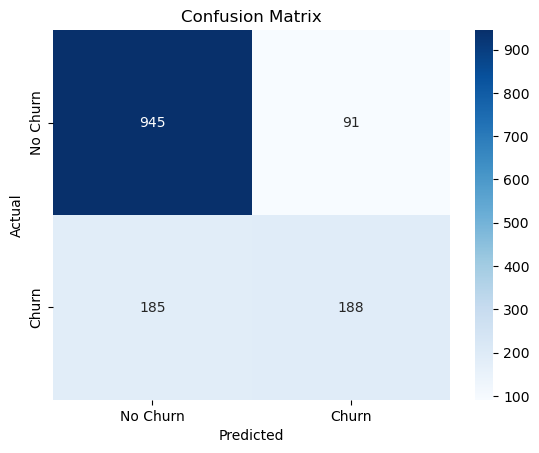

In [6]:
y_pred_prob = model.predict(X_test).ravel()
y_pred = (y_pred_prob > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [7]:
accuracy = (cm[0, 0] + cm[1, 1]) / cm.sum()
print(f"Accuracy: {accuracy:.4f}")

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

Accuracy: 0.8041


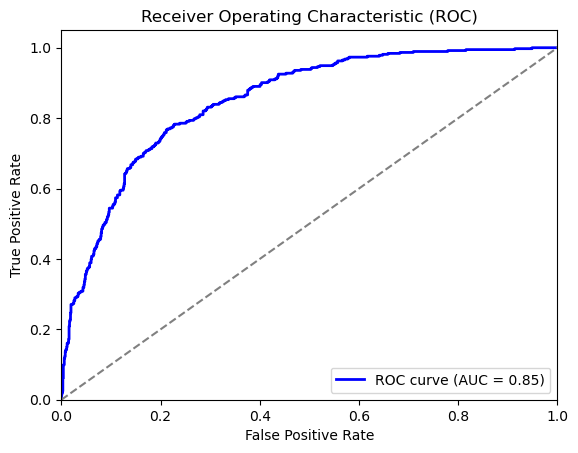

In [8]:
plt.figure()
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc="lower right")